In [5]:
#Importando as bibliotecas
import numpy as np
import pandas as pd

In [6]:
#Carregando um conjunto de dados para análise
dados = pd.read_csv('agricultural_raw_material.csv')

In [7]:
dados.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [8]:
#Explorando o conjuto de dados
dados.info

#Checando a existência de valores nulos
dados.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

# Lidar com dados ausentes, incorretos e inválidos

In [9]:
dados = dados.replace('%', '', regex=True)
dados = dados.replace(',', '', regex=True)
dados = dados.replace('-', '', regex=True)
dados = dados.replace('', np.nan)
dados = dados.replace('MAY90', np.nan)

#Excluindo linhas com valores NaN
dados = dados.dropna()

dados.isnull().sum()

#Convertendo dados para o tipo Float
lista = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
dados[lista] = dados[lista].astype("float")
dados.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [10]:
dados.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


# formatando a coluna datetime e definindo-a como índice para o conjunto de dados

In [11]:
dados.Month = pd.to_datetime(dados.Month.str.upper(), format='%b%y', yearfirst=False)
#indexando Mês
dados = dados.set_index('Month')

In [12]:
dados.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


# Análise Exploratória e Visualização

In [13]:
 #Importando matplotlib.pyplot e seaborn.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

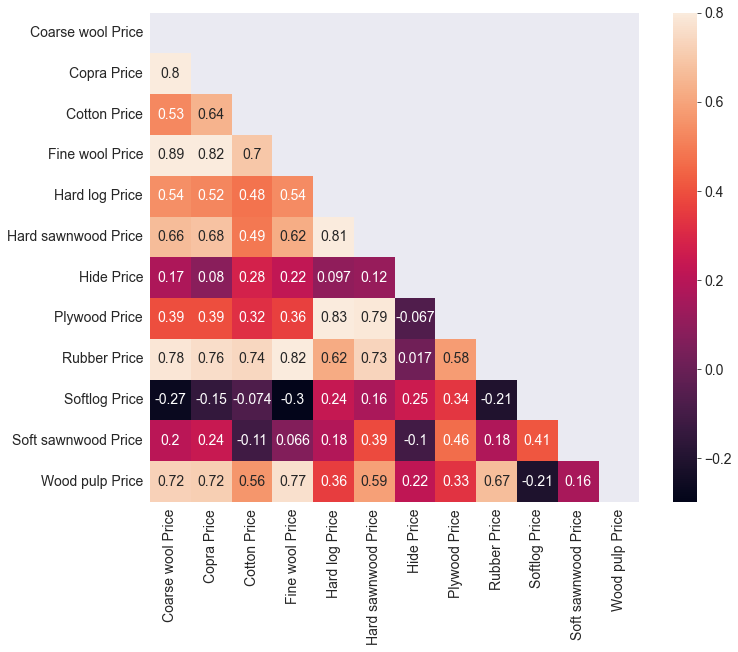

In [14]:
#Mapa de Calor -> Heatmap
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#Obtendo a matriz de correlação
corrmat = dados[raw_data].corr()
#definindo o tamanho do gráfico
fig = plt.figure(figsize = (12, 9))
#mascarando a parte superior do traingle, uma vez que a matriz é simétrica (repetitiva)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

# O mapa de calor mostra a correlação entre as matérias-primas maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente


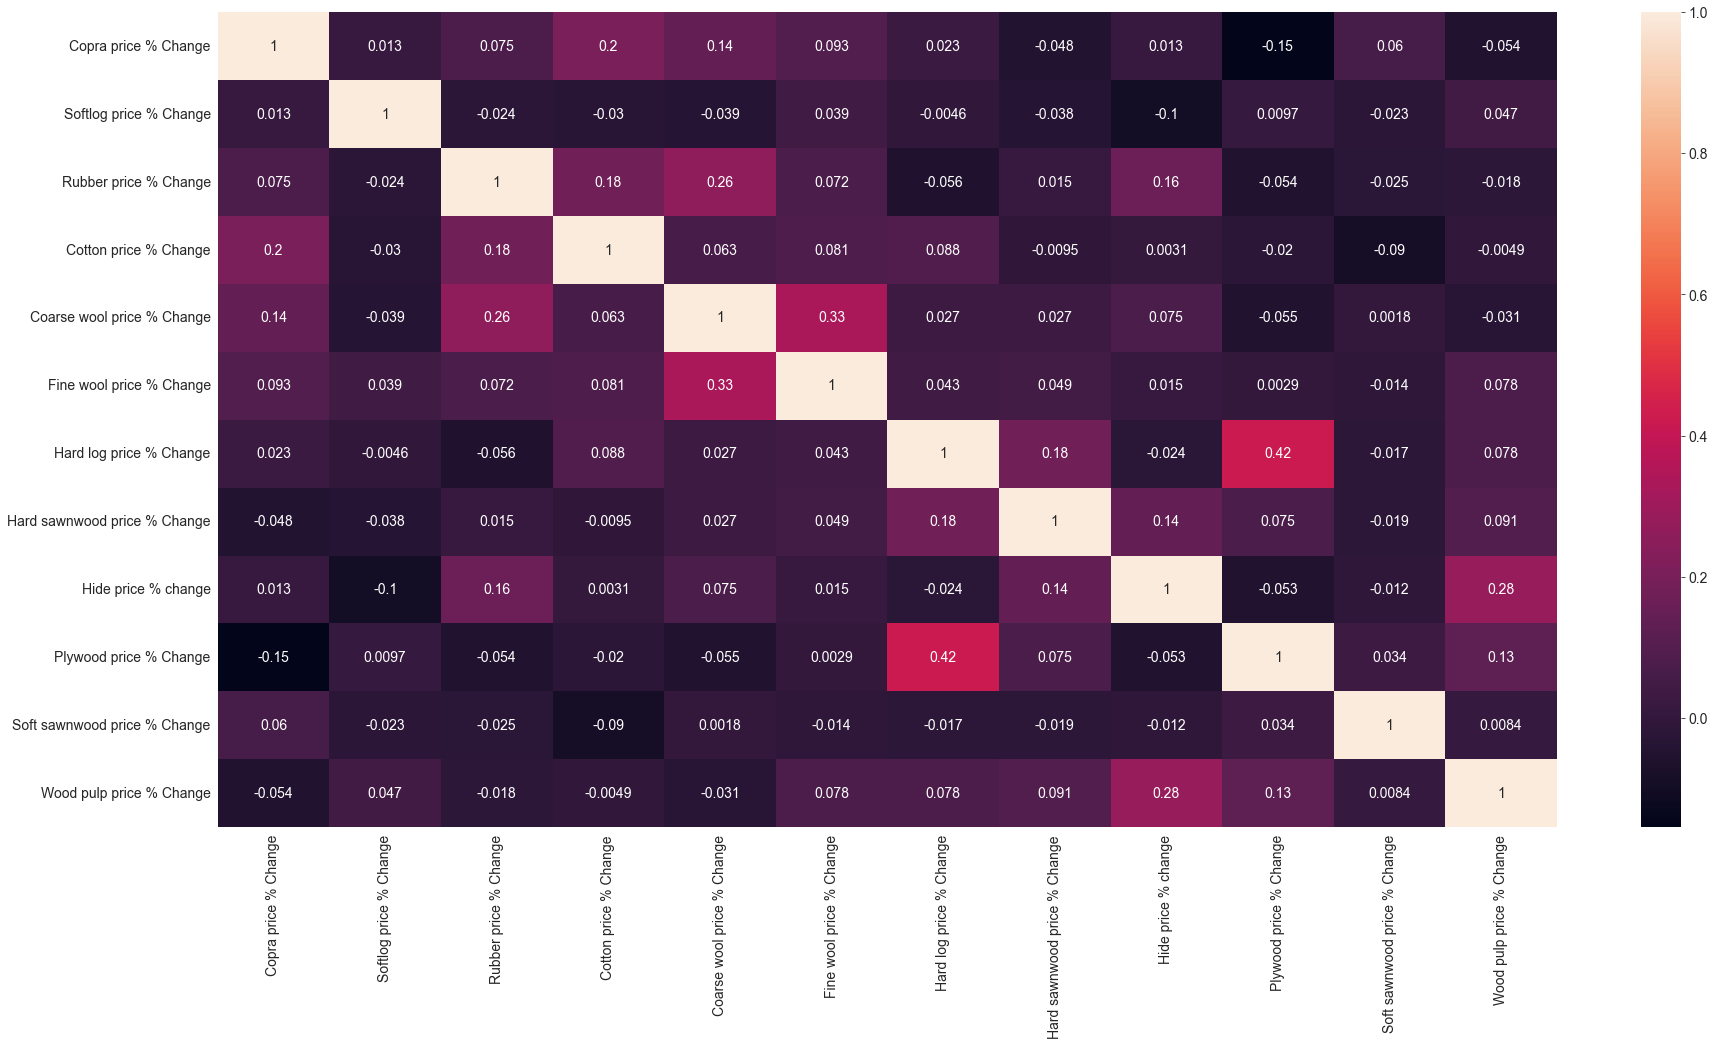

In [17]:
plt.figure(figsize = (30, 15))
changelist = ['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#gerar uma matriz de correlação para todo o conjunto de dados
corrMatrix = dados[changelist].corr()
sns.heatmap(corrMatrix, annot= True)
plt.show()

# A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas
# o valor negativo implica que duas variáveis estão negativamente correlacionadas (um aumento, outro decréscimo) 
# Zero implica nenhuma relação
# caso contrário, maior o valor maior a chance de relação. preços e seus gráficos de % de mudança

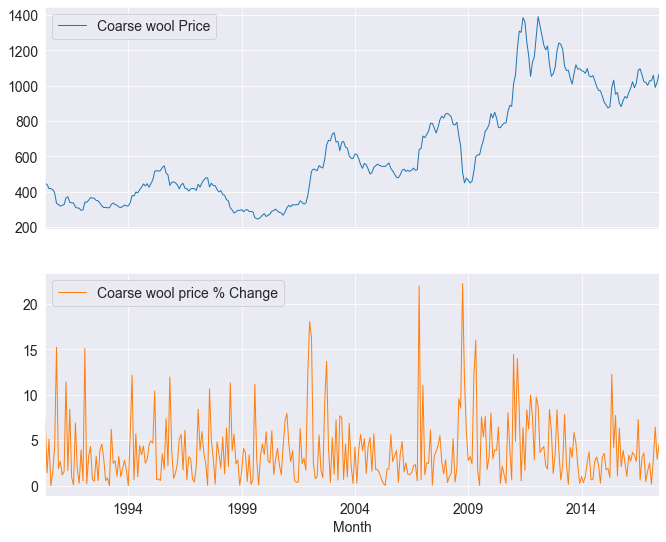

In [19]:
#Lã grossa
axes=dados[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)


In [20]:
#Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.

# Fazendo e respondendo perguntas

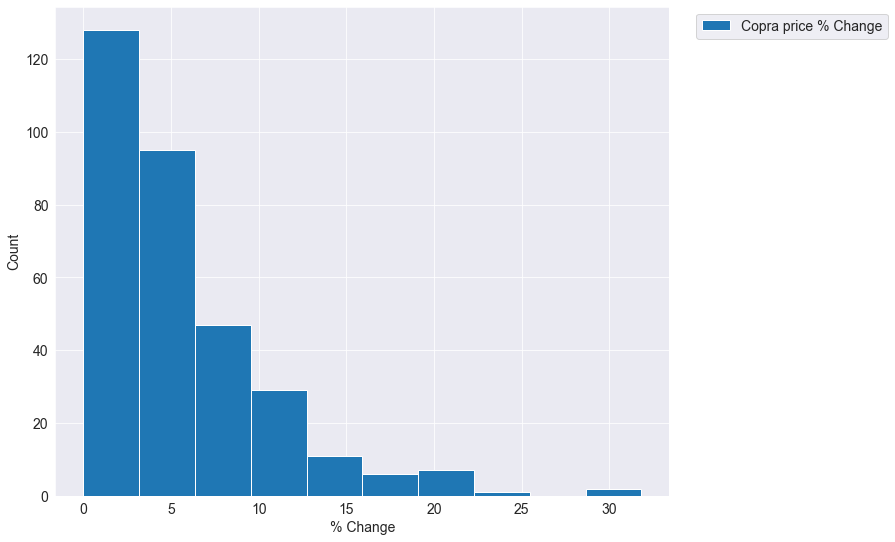

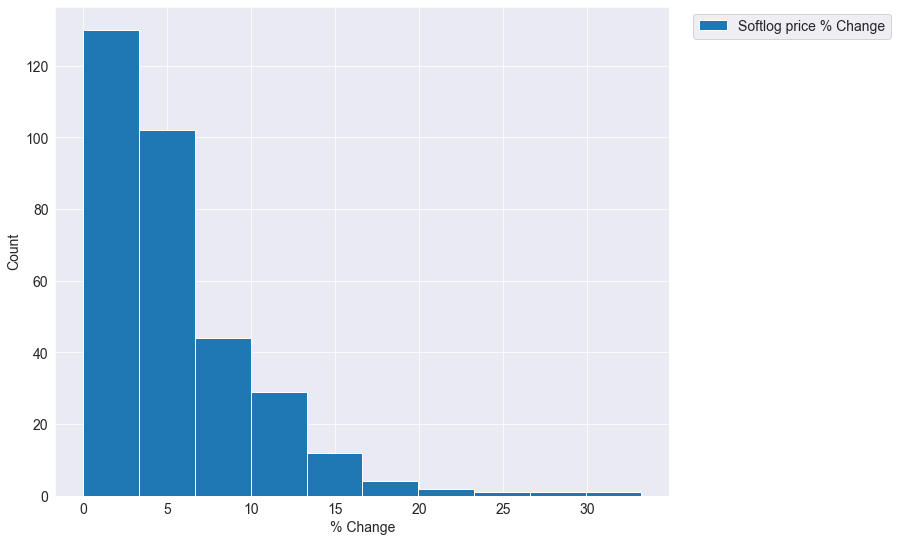

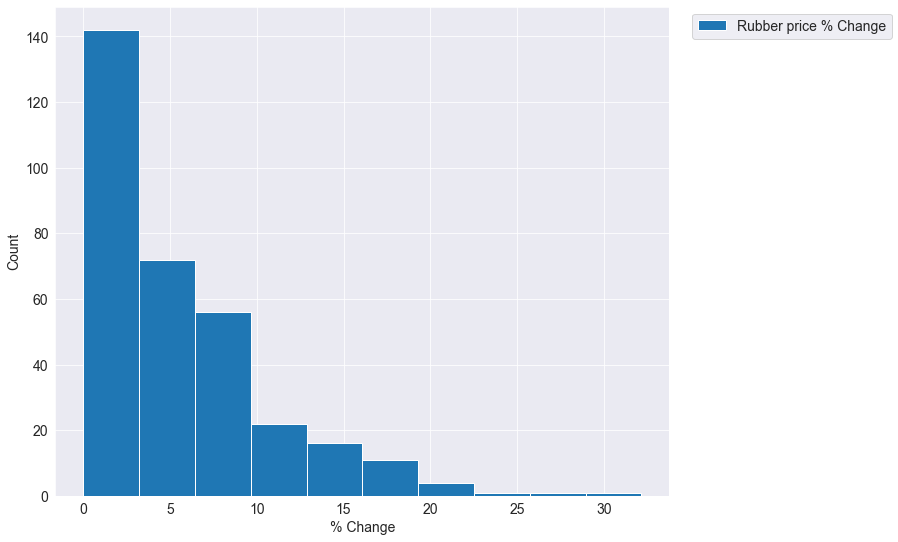

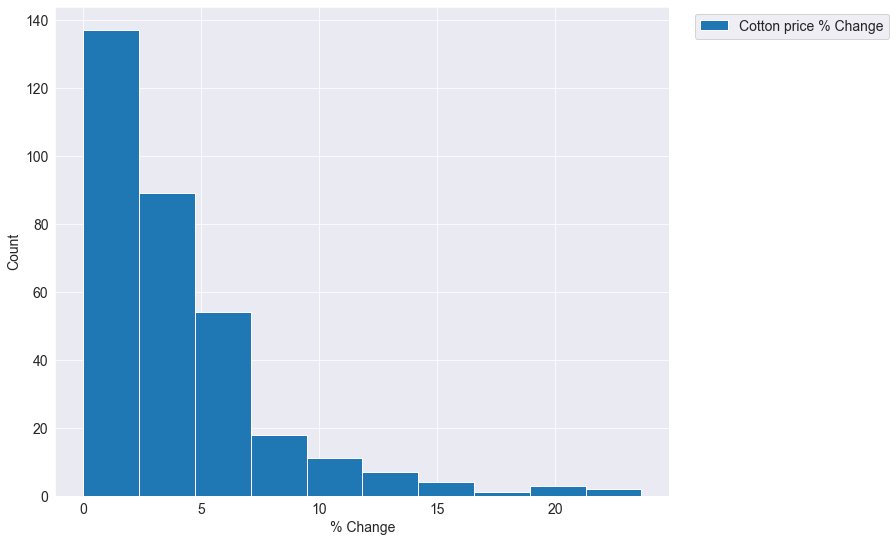

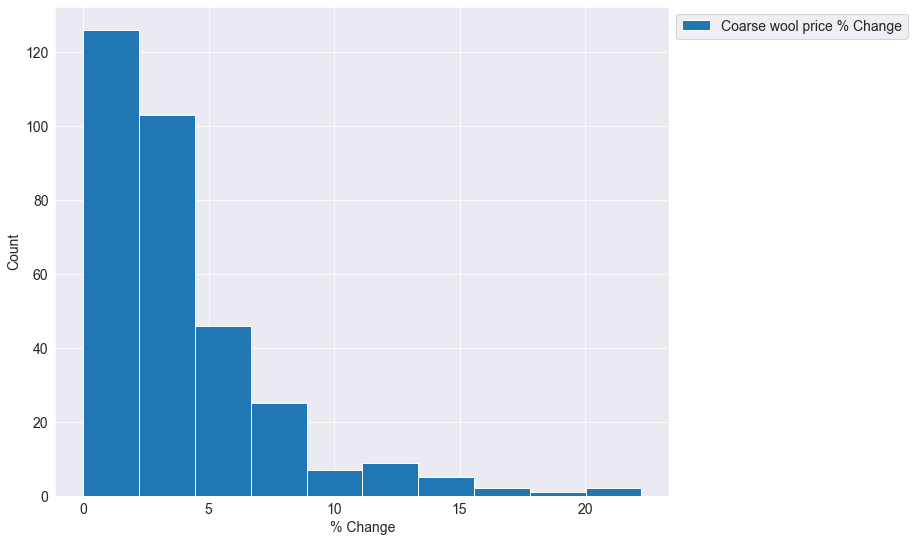

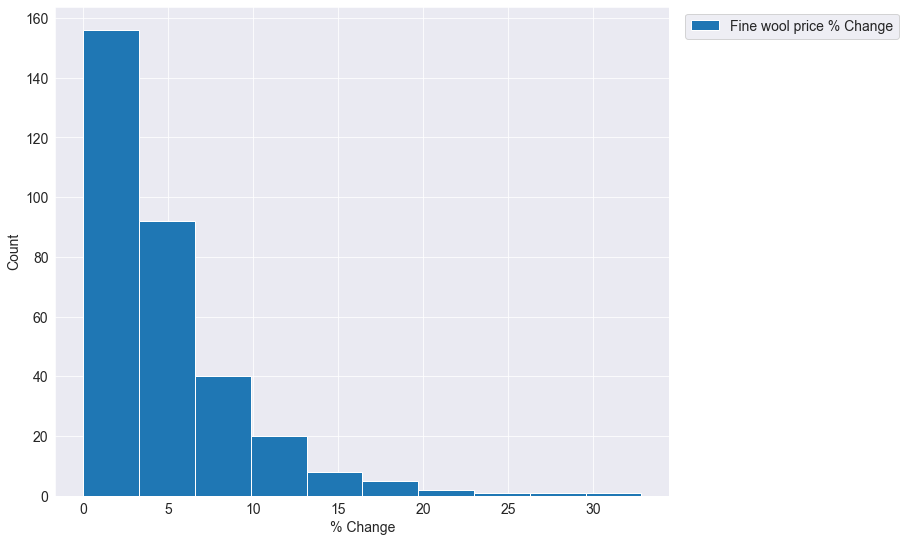

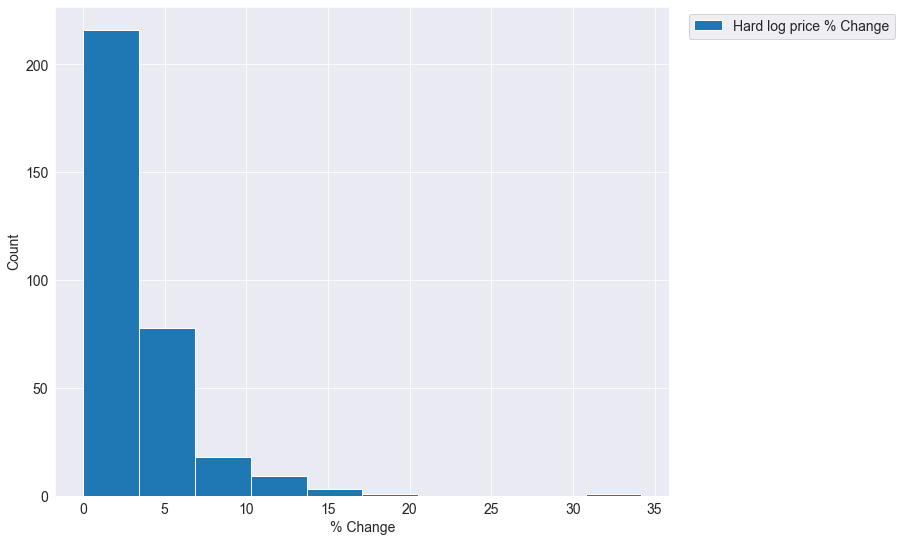

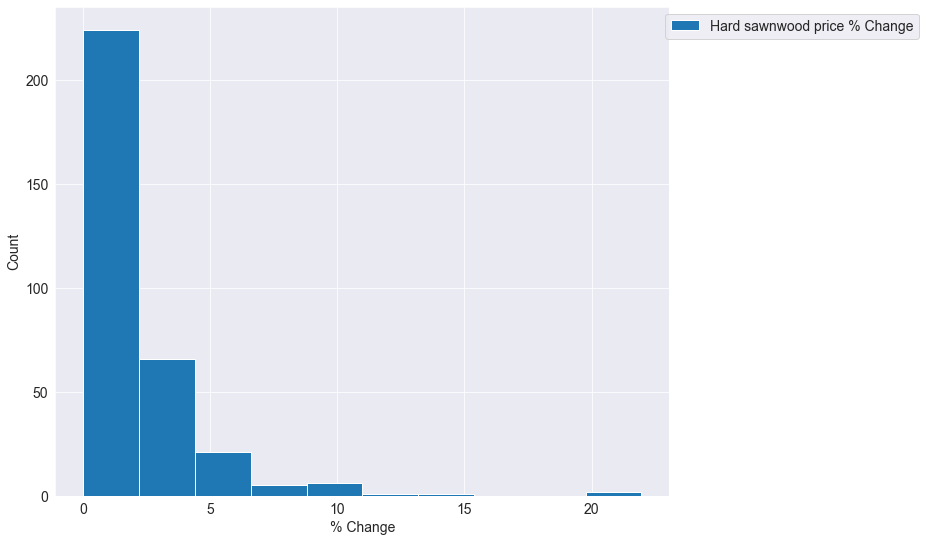

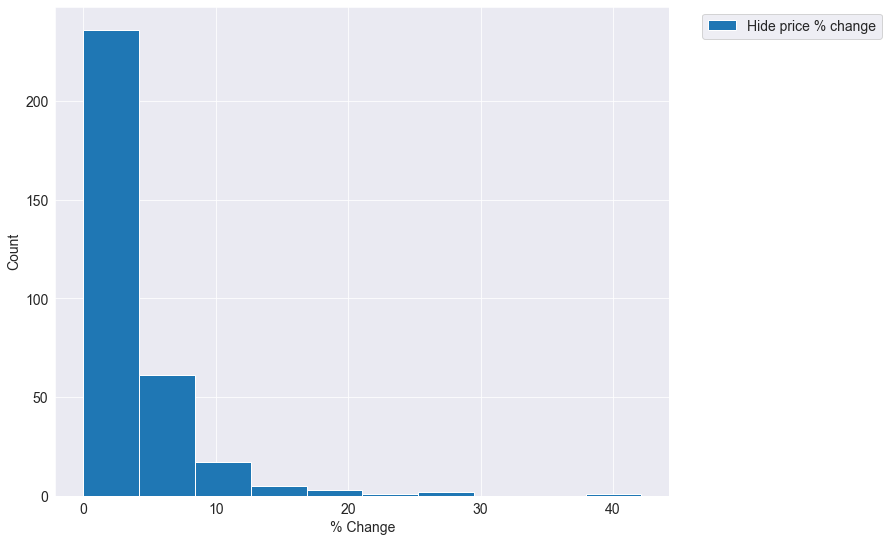

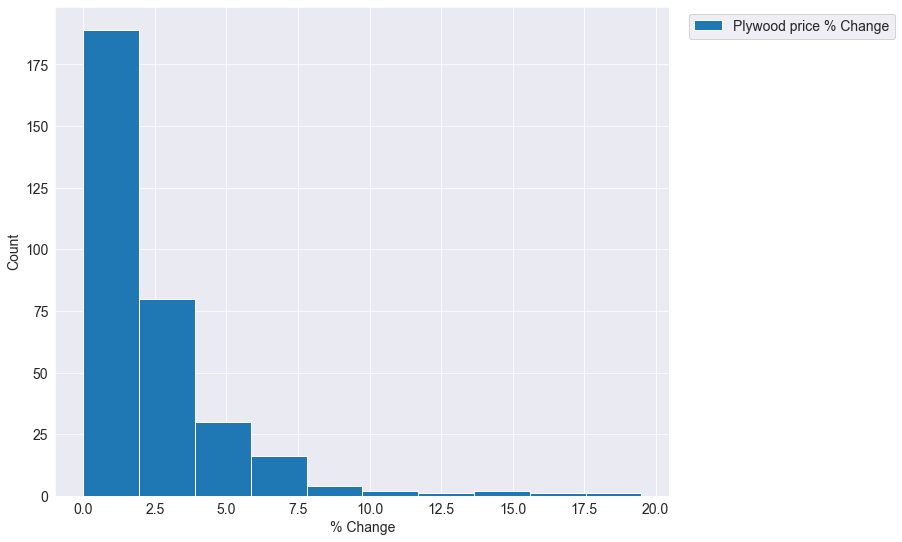

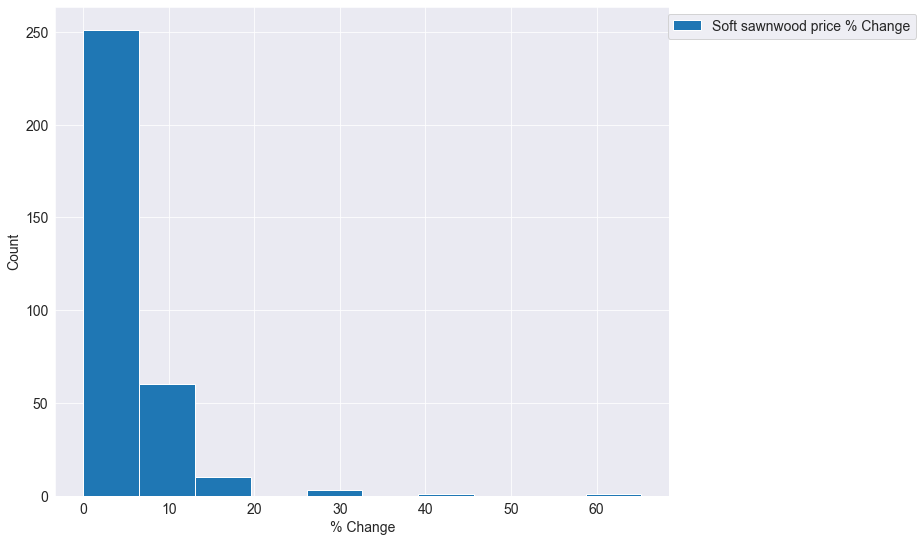

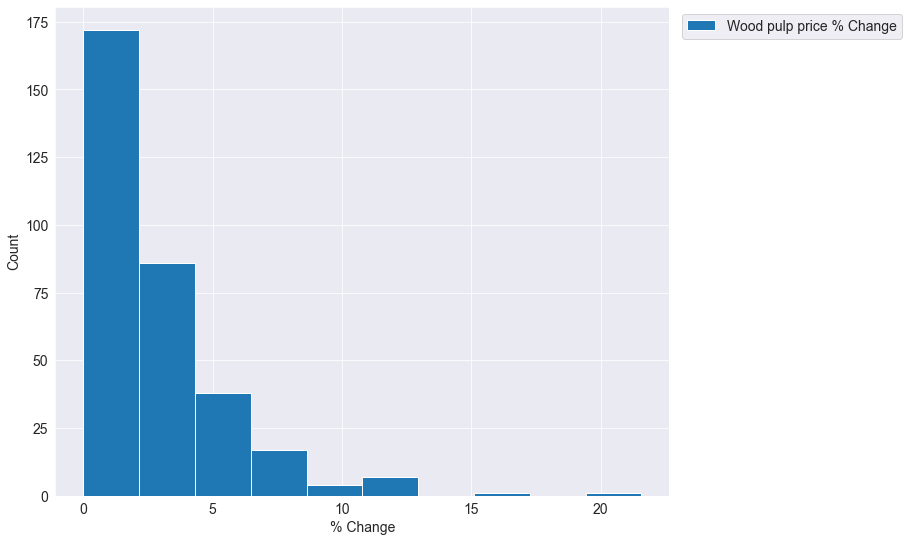

In [22]:
#Q1: Descubra a variação normal do preço de cada matéria-prima
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize = (12,12))
    dados[changelist[i]].hist(figsize=(11,9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('Count')
    plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2,1))

In [23]:
#Podemos observar que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%

Text(0.5, 0.98, 'Raw-Materials price comparision')

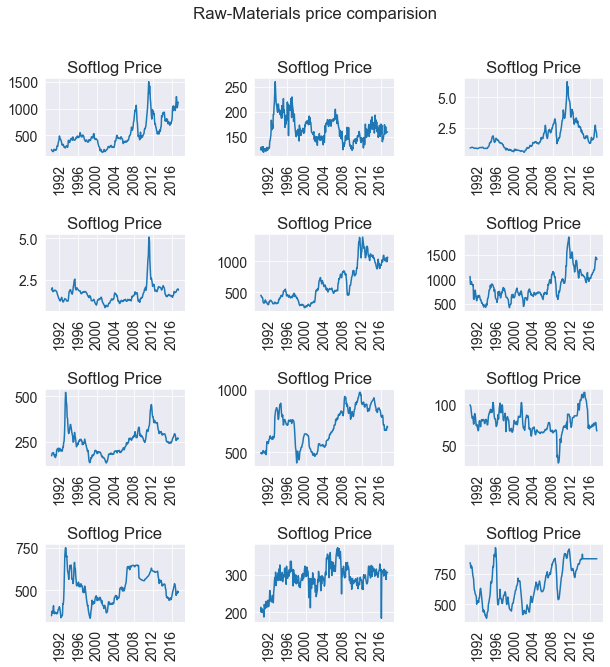

In [26]:
#Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos
plt.figure(figsize=(10,10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1, wspace=0.5)
    plt.title(materialslist[1])
    plt.plot(dados[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")

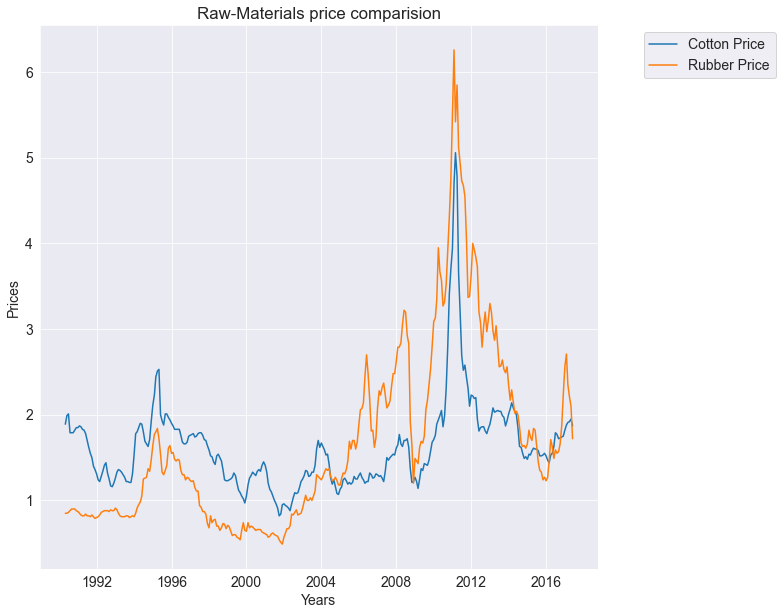

In [27]:
#Podemos ver que o algodão e a borracha são de preços mais baixos vamos comparar preços para entender melhor qual é o mais baixo
plt.figure(figsize=(10,10))
plt.plot(dados[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

In [28]:
#algodão é matéria-prima de menor preço nos últimos anos
#Tanto o algodão quanto a borracha são materiais de baixo preço

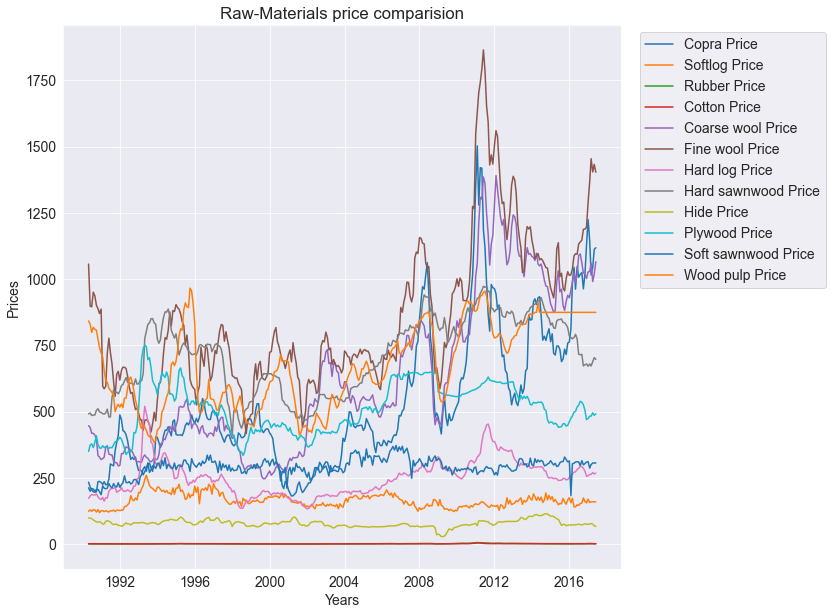

In [29]:
plt.figure(figsize=(10,10))
plt.plot(dados[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

# A partir dos gráficos pudemos analisar as matérias-primas em tipos de acordo com seu preço ao longo dos anos

# materiais de baixo preço

# -algodão, couro, softlog, log duro, preço de madeira serrada macia, borracha

# Materiais de alto preço

# -lã grossa,copra,lã fina,madeira serrada dura,pasta de madeira,madeira compensada



In [30]:
#Q3: qual matéria-prima tem a maior e menor variação de % de preço
import random as rd

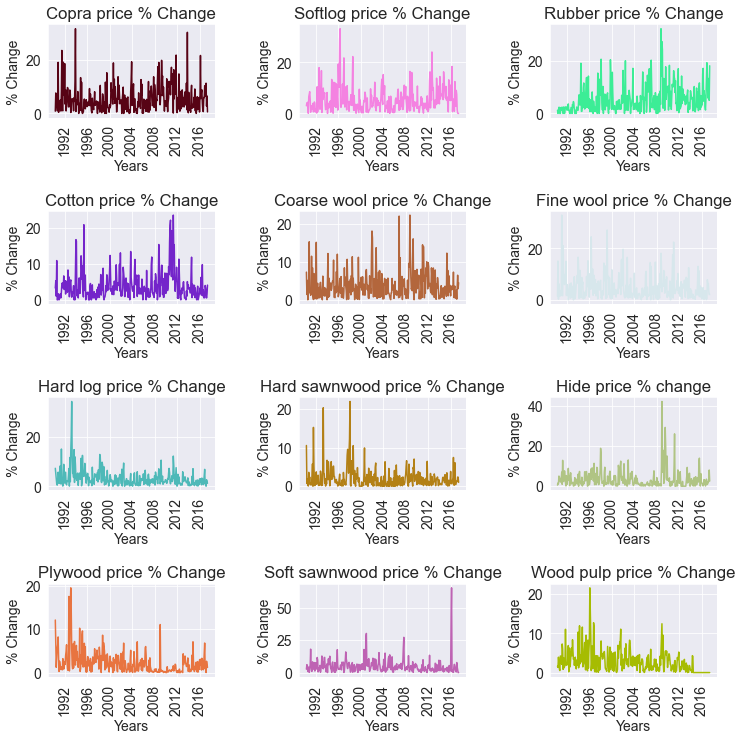

In [32]:
plt.figure(figsize=(12,12))
for i in range(len(changelist)):
    r = rd.random()
    b = rd.random()
    g = rd.random()
    color = (r, g, b)
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust( hspace=1, wspace=0.5)
    plt.plot(dados[changelist[i]], c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')

In [33]:
#Podemos ver a maior % de mudança em mais de 60 para madeira serrada macia e a menor % de mudança é para madeira compensada em menos de 20

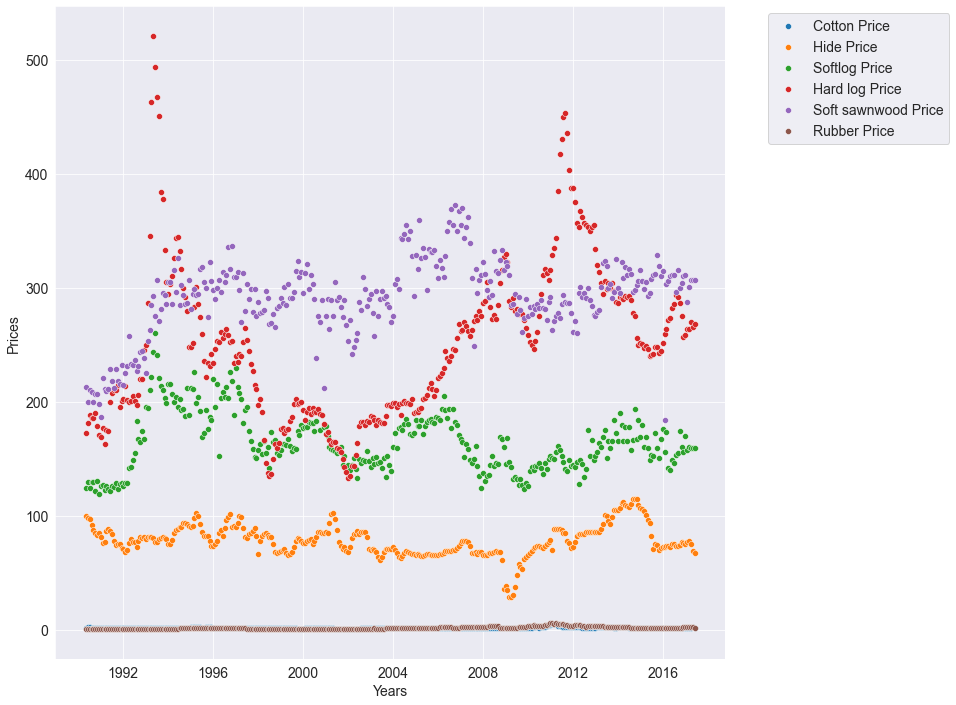

In [35]:
#Q4: Encontre as matérias-primas com mudança drástica de preço
lowlist = ['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')

for i in range(len(lowlist)):
    sns.scatterplot(y=dados[lowlist[i]], x=dados.index);
    plt.legend(lowlist, loc='upper center', bbox_to_anchor=(1.2,1))

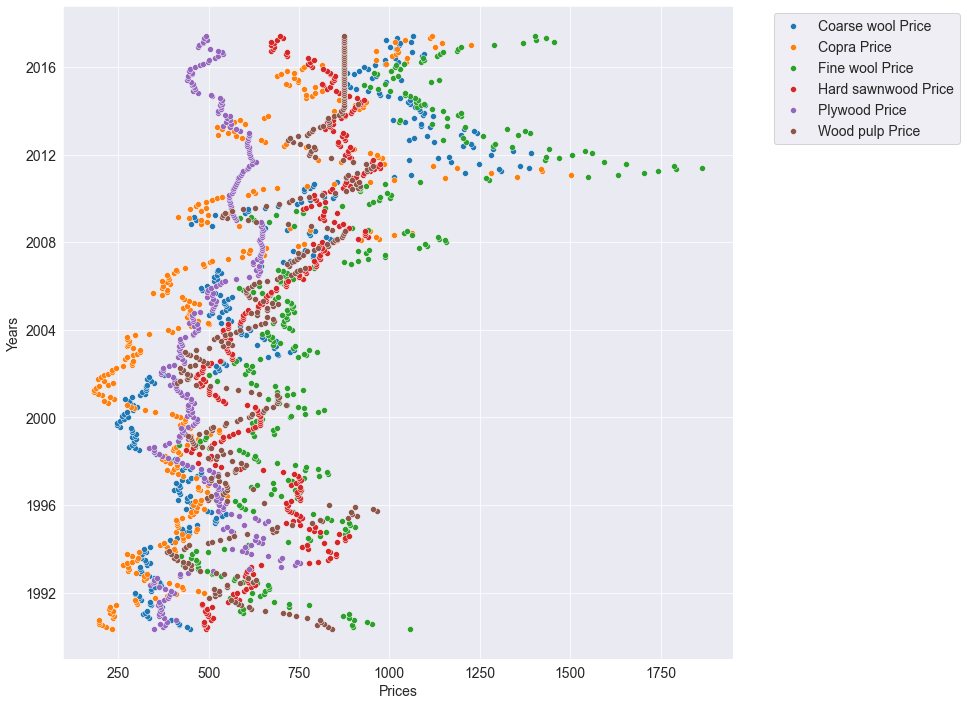

In [37]:
highlist = ['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=dados[highlist[i]], y=dados.index)
    plt.legend(highlist, loc='upper center', bbox_to_anchor=(1.2,1))

# A mudança de preço é drástica para o preço de tora dura entre materiais de baixa faixa de preço e entre materiais de alto preço, são os preços de lã fina

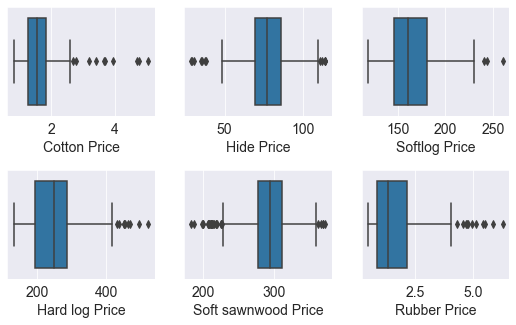

In [38]:
#Q5: Descobrir a faixa de preço de matérias-primas de baixo preço

lowlist = ['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=dados[lowlist[i]])

# Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo e outliers

# Inferências e Conclusão
# Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
# alta e baixa % de variação dos materiais
# Pudemos identificar a variação de preços ao longo dos anos.
# Correlação entre eles usando um mapa de calor

## Trabalho futuro
# Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.

# Também pudemos prever os preços das matérias-primas analisando os anos anteriores

# Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.